<a href="https://colab.research.google.com/github/abdulsamadkhan/HayStack/blob/main/Introduction_to_RAG_in_Haystack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# RAG pipeline on HayStack!

In the previous tutorial, we developed an **indexing pipeline** 🛠️ and explored **components** and **pipelines**, along with some important functions.

In this tutorial, we will dive deeper into **Haystack** 🔍, utilizing different components to build a complete **Retrieval-Augmented Generation (RAG) pipeline**.

Our goal is to create a pipeline that:
- 📖 Reads data from provided links
- ❓ Allows you to ask questions
- 💡 Returns answers based on the retrieved information


## Let's Get Started with the RAG Pipeline! 🧠

Below is an image showing a typical **RAG Pipeline** in Haystack. It contains key components such as the **Embedder**, **Retriever**, **Prompt Builder**, and **Generator**:

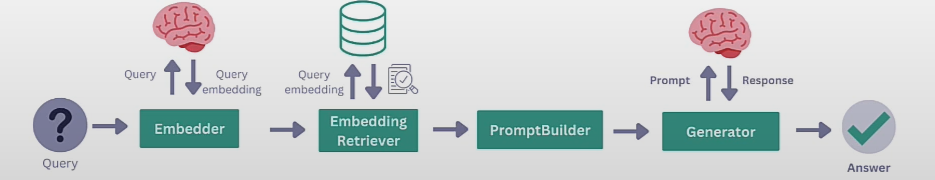

These components work together as follows:
- **Embedder**: Converts the query into an embedding (vector representation).
- **Retriever**: Finds relevant information based on the embeddings.
- **Prompt Builder**: Builds a prompt for the generator using the retrieved information.
- **Generator**: Uses the prompt to generate the final answer.

Let's dive in and import these components 🛠️. We will then connect them in a pipeline to build our RAG system! 🚀


# 1. Installing Prerequisite Libraries 📦

Before we begin building our RAG pipeline, let's make sure we have all the necessary libraries installed. To set up **Haystack** and its dependencies, you can follow these steps:



In [ ]:
!pip install haystack-ai==2.2.4                # Install Haystack AI core library (version 2.2.4)
!pip install haystack-experimental==0.1.0      # Install experimental features for Haystack (version 0.1.0)
!pip install sentence-transformers>=2.2.0      # Install SentenceTransformers for embedding-based retrievers (version 2.2.0 or higher)
# !pip install transformers==4.42.3             # Install specific version of Hugging Face Transformers (commented out)
!pip install huggingface_hub==0.23.4           # Install Hugging Face Hub for model management (version 0.23.4)
!pip install cohere-haystack==1.1.3            # Install Cohere integration for Haystack (version 1.1.3)
!pip install trafilatura==1.11.0               # Install Trafilatura for web scraping and parsing (version 1.11.0)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

# 2. Importing components for the pipeline

In this tutorial, we will use several new components to build our RAG pipeline.

- **Prompt Builder 📝**:
  -  The `PromptBuilder` allows customization of how the prompt is structured, such as including relevant context, instructions, and user queries.
  - [Learn more about PromptBuilder in Haystack](https://docs.haystack.deepset.ai/reference/builders-api#module-prompt_builder)

- **HTMLToDocument 📄**:
  - This is useful when you're fetching web pages and need to convert their HTML structure into usable content for further processing like retrieval or question-answering.
  - [Learn more about HTMLToDocument in Haystack](https://docs.haystack.deepset.ai/docs/converters#htmltodocument)

- **Link Content Fetcher 🔗**:
  - The `LinkContentFetcher` is used to retrieve the content from the web pages based on a list of URLs. It pulls the raw HTML content from these links, which can then be passed to components like `HTMLToDocument` for further conversion and use in the pipeline.
  - [Learn more about Link Content Fetcher in Haystack](https://docs.haystack.deepset.ai/docs/fetchers#linkcontentfetcher)


In [ ]:
from haystack import Pipeline                                      # Import the Pipeline class to create and manage the RAG pipeline
from haystack.utils.auth import Secret                             # Import Secret for handling authentication and API keys securely
from haystack.components.builders import PromptBuilder             # Import PromptBuilder to create prompts for the generator
from haystack.components.converters import HTMLToDocument          # Import HTMLToDocument to convert HTML content to Document objects
from haystack.components.fetchers import LinkContentFetcher        # Import LinkContentFetcher to retrieve content from provided URLs
from haystack.components.generators import OpenAIGenerator         # Import OpenAIGenerator to generate answers using OpenAI models
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever  # Import InMemoryEmbeddingRetriever for retrieving documents based on embeddings
from haystack.components.writers import DocumentWriter             # Import DocumentWriter to write or store processed documents
from haystack.document_stores.in_memory import InMemoryDocumentStore  # Import InMemoryDocumentStore for storing and managing documents in memory
from haystack.components.embedders import OpenAITextEmbedder, OpenAIDocumentEmbedder  # Import OpenAI embedders to convert text and documents into embeddings


# 3. Initialize Components
Initialize all the components and pass the parameters if needed.

In [ ]:
import os
from google.colab import userdata

# Set environment variable
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')

document_store = InMemoryDocumentStore()

fetcher = LinkContentFetcher()
converter = HTMLToDocument()
embedder = OpenAIDocumentEmbedder()

writer = DocumentWriter(document_store=document_store)

indexing = Pipeline()
indexing.add_component("fetcher", fetcher)
indexing.add_component("converter", converter)
indexing.add_component("embedder", embedder)
indexing.add_component("writer", writer)

indexing.connect("fetcher.streams", "converter.sources")
indexing.connect("converter", "embedder")
indexing.connect("embedder", "writer")

🚅 Components
  - fetcher: LinkContentFetcher
  - converter: HTMLToDocument
  - embedder: OpenAIDocumentEmbedder
  - writer: DocumentWriter
🛤️ Connections
  - fetcher.streams -> converter.sources (List[ByteStream])
  - converter.documents -> embedder.documents (List[Document])
  - embedder.documents -> writer.documents (List[Document])

# 4. visualize the pipeline.

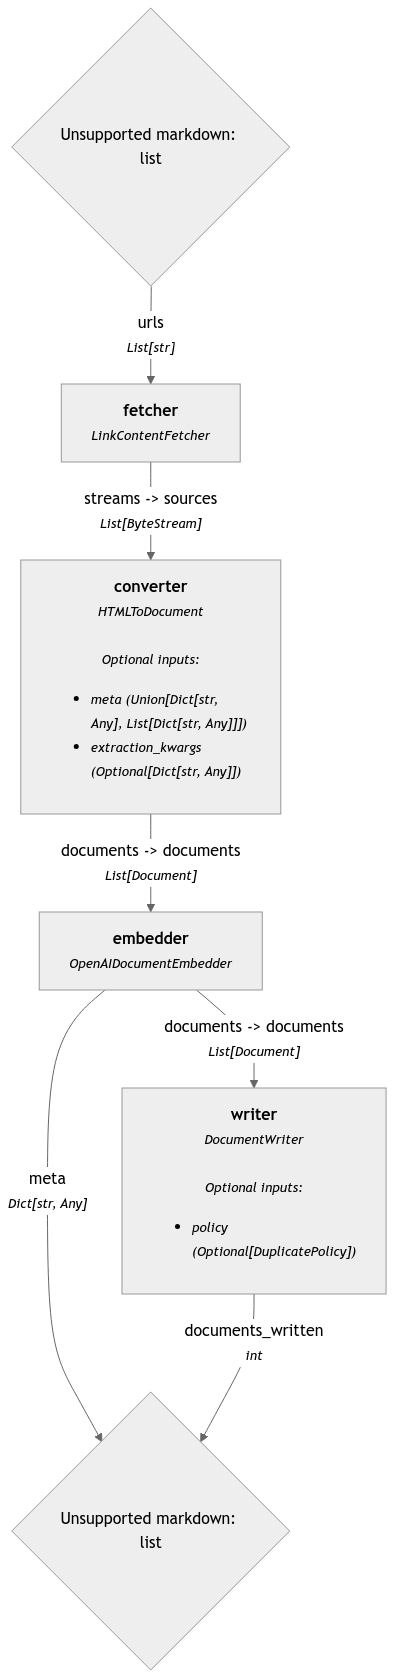

In [ ]:
indexing.show()

#5. Running Index pipeline 🔗

For this tutorial, we’ll use some example URLs taken from the **DeepLearning.AI** course. These URLs will contain content that we will pass through our RAG pipeline to retrieve and generate answers. You can pass as many URLs as you like, depending on the size and scope of your task.

Here’s something important to note:
- The URLs we’ve chosen for this tutorial contain **very little data**. Due to the small amount of content, we haven't included a document splitter in this pipeline.
- **However**, if you are working with larger documents or a greater number of URLs, you will need a **splitter** component to divide larger content into smaller, more manageable chunks. You can adjust and reconfigure the pipeline based on your specific needs.


In [ ]:
indexing.run(
    {
        "fetcher": {
            "urls": [
                "https://haystack.deepset.ai/integrations/cohere",
                "https://haystack.deepset.ai/integrations/anthropic",
                "https://haystack.deepset.ai/integrations/jina",
                "https://haystack.deepset.ai/integrations/nvidia",
            ]
        }
    }
)

Calculating embeddings: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


{'embedder': {'meta': {'model': 'text-embedding-ada-002',
   'usage': {'prompt_tokens': 5470, 'total_tokens': 5470}}},
 'writer': {'documents_written': 4}}

### PromptBuilder 📝

The **PromptBuilder** is a crucial component in the Haystack RAG pipeline. It renders a prompt by filling in any variables, preparing it to be sent to the **Generator**.

The prompt builder uses **Jinja2 template syntax**, which allows for flexible and customizable prompts.

#### Key Points:
- The prompt can be customized according to the needs of your application.
- Variables in the default template are optional, so you can provide only the ones you need.

Here's an example of a simple template used in PromptBuilder:
```python
template = "Given the context: {{context}}, answer the following question: {{query}}"


In [ ]:
prompt = """
Answer the question based on the provided context.
Context:
{% for doc in documents %}
   {{ doc.content }}
{% endfor %}
Question: {{ query }}
"""

# 6. RAG pipeline

We have no seen all the components that are needed for our basic pipeline including the `prompt builder`, so now let's create a RAG pipeline which uses the already created `document_store` from the URLs.

In [ ]:
query_embedder = OpenAITextEmbedder()
retriever = InMemoryEmbeddingRetriever(document_store=document_store)
prompt_builder = PromptBuilder(template=prompt)
generator = OpenAIGenerator()

rag = Pipeline()
rag.add_component("query_embedder", query_embedder)
rag.add_component("retriever", retriever)
rag.add_component("prompt", prompt_builder)
rag.add_component("generator", generator)

rag.connect("query_embedder.embedding", "retriever.query_embedding")
rag.connect("retriever.documents", "prompt.documents")
rag.connect("prompt", "generator")

🚅 Components
  - query_embedder: OpenAITextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt: PromptBuilder
  - generator: OpenAIGenerator
🛤️ Connections
  - query_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt.documents (List[Document])
  - prompt.prompt -> generator.prompt (str)

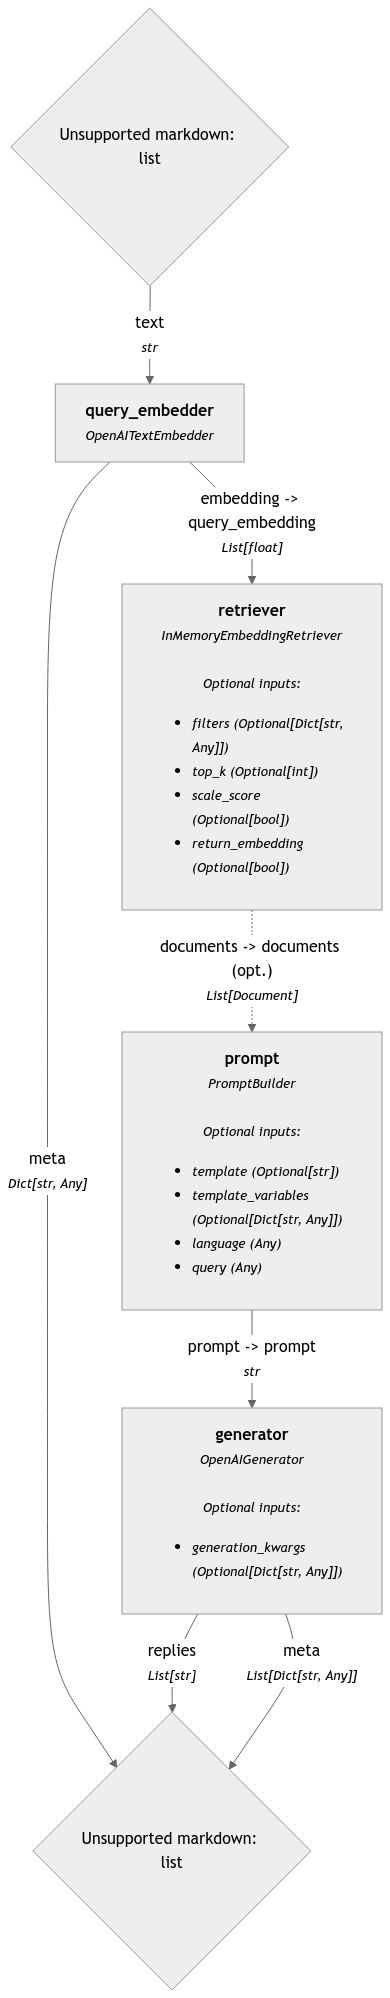

In [ ]:
# visualize the RAG pipeline
rag.show()

### runing the RAG piepline.

In [ ]:
question = "How can I use Cohere with Haystack?"

result = rag.run(
    {
        "query_embedder": {"text": question},
        "retriever": {"top_k": 1},
        "prompt": {"query": question},
    }
)

print(result["generator"]["replies"][0])

To use Cohere with Haystack, you can follow the installation and usage instructions provided in the context. Depending on your specific use case, you can integrate Cohere models with Haystack in various ways such as embedding models, generative models (LLMs), chat generators, and ranker models. The context provides detailed examples and code snippets for each integration, including instructions on how to initialize components like CohereDocumentEmbedder, CohereTextEmbedder, CohereGenerator, CohereChatGenerator, and CohereRanker in your pipelines.


### Returning URLs with Metadata in RAG Pipeline
The goal is to modify the RAG pipeline to not only generate a response based on relevant documents but also provide the URLs of those documents. This enhances the transparency and traceability of the generated content.

In [ ]:
prompt = """
You will be provided some context, followed by the URL that this context comes from.
Answer the question based on the context, and reference the URL from which your answer is generated.
Your answer should be in {{ language }}.
Context:
{% for doc in documents %}
   {{ doc.content }}
   URL: {{ doc.meta['url']}}
{% endfor %}
Question: {{ query }}
Answer:
"""

### running the RAG with modified query

In [ ]:
query_embedder = OpenAITextEmbedder()
retriever = InMemoryEmbeddingRetriever(document_store=document_store)
prompt_builder = PromptBuilder(template=prompt)
generator = OpenAIGenerator(model="gpt-3.5-turbo")

rag = Pipeline()
rag.add_component("query_embedder", query_embedder)
rag.add_component("retriever", retriever)
rag.add_component("prompt", prompt_builder)
rag.add_component("generator", generator)

rag.connect("query_embedder.embedding", "retriever.query_embedding")
rag.connect("retriever.documents", "prompt.documents")
rag.connect("prompt", "generator")

🚅 Components
  - query_embedder: OpenAITextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt: PromptBuilder
  - generator: OpenAIGenerator
🛤️ Connections
  - query_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt.documents (List[Document])
  - prompt.prompt -> generator.prompt (str)

In [ ]:
question = "How can I use Cohere with Haystack?"

result = rag.run(
    {
        "query_embedder": {"text": question},
        "retriever": {"top_k": 1},
        "prompt": {"query": question, "language": "Urdu"},
    }
)

print(result["generator"]["replies"][0])

آپ Cohere کو Haystack کے ساتھ استعمال کیسے کرسکتے ہیں؟ آپ Cohere ماڈلز کو Haystack 2.0 پائپ لائنز میں استعمال کرسکتے ہیں جینریٹرز اور ایمبیڈرز کے ساتھ۔ آپ ایمبیڈنگ ماڈلز استعمال کرسکتے ہیں۔

URL: https://haystack.deepset.ai/integrations/cohere


# Conclusion 🎉
By the end of this tutorial, we have learned about creating RAG pipeline in Haystack, and we created a pipeline that can be used to answer questions based on the urls.

In the next tutorial, we will explore on how to create custome components in the Haystack framework.

See you in the next tutorial! 🤩🤩🤩

Reference
https://docs.haystack.deepset.ai/docs/creating-pipelines
DeepLearnning.Ai